In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Análisis descriptivo de las variables previo al preprocesamiento

In [3]:
actual= pd.read_csv('../data/actual.csv')
previos= pd.read_csv('../data/previos.csv')

In [4]:
print(previos.shape, actual.shape, previos.shape[0]/actual.shape[0])

(925900, 41) (9259, 27) 100.0


## Análisis de las variables contextuales

In [5]:
actual['year'].value_counts()

year
2023    2509
2024    2453
2022    2226
2021    2071
Name: count, dtype: int64

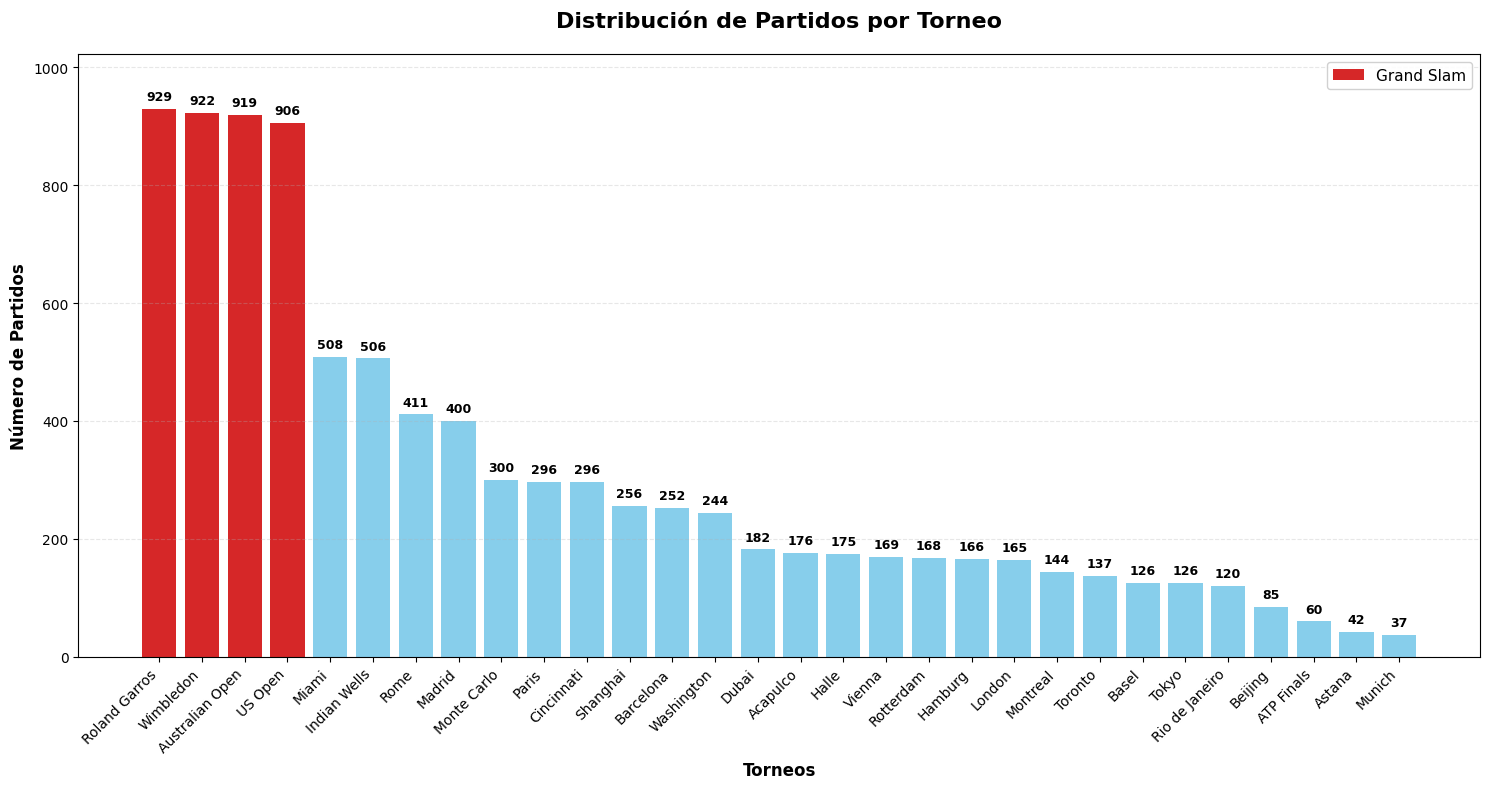

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener los datos
tournament_counts = actual['tournamentName'].value_counts().head(30)

# Definir categorías de torneos
grand_slams = ['Roland Garros', 'Wimbledon', 'Australian Open', 'US Open']

# Función para categorizar torneos
def categorize_tournament(name):
    if any(gs in name for gs in grand_slams):
        return 'Grand Slam'
    else:
        return 'Otros'

# Crear categorías para cada torneo
categories = [categorize_tournament(name) for name in tournament_counts.index]

# Definir colores
colors = {'Grand Slam': '#d62728',     # Rojo
          'Masters 1000': '#87CEEB',   # Azul claro
          'ATP 500': '#87CEEB',        # Azul claro
          'Otros': '#87CEEB'}          # Azul claro

# Crear la figura
plt.figure(figsize=(15, 8))

# Crear las barras con colores según categoría
bars = plt.bar(range(len(tournament_counts)), 
               tournament_counts.values,
               color=[colors[cat] for cat in categories])

# Configurar el gráfico
plt.title('Distribución de Partidos por Torneo', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Torneos', fontsize=12, fontweight='bold')
plt.ylabel('Número de Partidos', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x
plt.xticks(range(len(tournament_counts)), 
           tournament_counts.index, 
           rotation=45, 
           ha='right',
           fontsize=10)

plt.subplots_adjust(bottom=0.15)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['Grand Slam'], label='Grand Slam')]
plt.legend(handles=legend_elements, 
           loc='upper right', 
           fontsize=11,
           framealpha=0.9)

# Añadir valores en las barras más altas
for i, (bar, value) in enumerate(zip(bars, tournament_counts.values)):
        plt.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + 10,
                str(value),
                ha='center', 
                va='bottom',
                fontsize=9,
                fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(tournament_counts.values) * 1.1)

plt.tight_layout()
plt.show()


groundType
Hardcourt outdoor    4521
Red clay             2615
Grass                1262
Hardcourt indoor      861
Name: count, dtype: int64


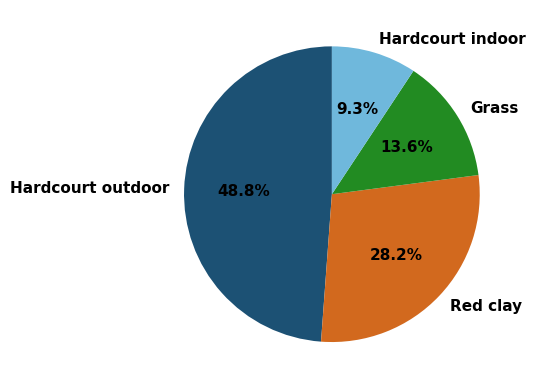

In [7]:
surface_counts = actual['groundType'].value_counts()
print(surface_counts)

# Definir colores representativos para cada superficie
colors = {
    'Hardcourt outdoor': '#1C5174',
    'Red clay': '#D2691E',           
    'Grass': '#228B22',             
    'Hardcourt indoor': '#6FB8DC'  
}

# Crear lista de colores en el orden de los datos
surface_colors = [colors.get(surface, '#888888') for surface in surface_counts.index]

# Crear el pie chart con mejores parámetros
wedges, texts, autotexts = plt.pie(surface_counts.values, 
                                   labels=surface_counts.index,
                                   autopct='%1.1f%%',
                                   colors=surface_colors,
                                   startangle=90,
                                   textprops={'fontsize': 11, 'fontweight': 'bold'})

# Mostrar el gráfico
plt.show()

## Análisis de variables de ranking
Se fusionan en home y away, porque esencialmente funcionan como la misma variable, aunque depende del partido será de un jugador u otro

In [11]:
actual_ranking = pd.concat([actual['ActualRankingHome'], actual['ActualRankingAway']], ignore_index=True)
best_ranking = pd.concat([actual['BestRankingHome'], actual['BestRankingAway']], ignore_index=True)

# Get describe statistics
actual_stats = actual_ranking.describe()
best_stats = best_ranking.describe()

# Add skewness and kurtosis
stats_index = ['mean', 'std', '50%', 'skew', 'kurt']
actual_values = [
	actual_stats['mean'],
	actual_stats['std'],
	actual_stats['50%'],
	actual_ranking.skew(),
	actual_ranking.kurt()
]
best_values = [
	best_stats['mean'],
	best_stats['std'],
	best_stats['50%'],
	best_ranking.skew(),
	best_ranking.kurt()
]

desc_df = pd.DataFrame({
	'Actual Ranking': actual_values,
	'Best Ranking': best_values
}, index=['mean', 'std', 'median', 'skewness', 'kurtosis'])

print(desc_df)

          Actual Ranking  Best Ranking
mean          798.858408    836.034561
std           112.699097     76.368582
median        828.000000    861.000000
skewness       -3.383682     -3.122051
kurtosis       18.190432     17.295862


Distribución del ranking

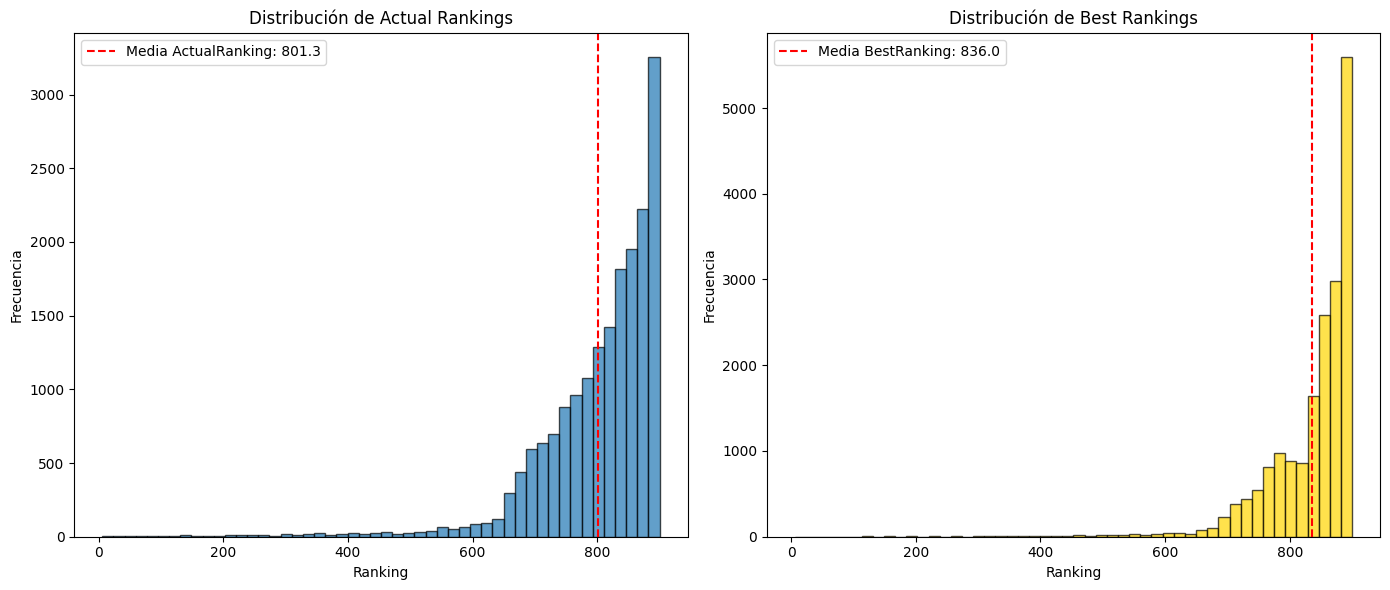

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
actual_ranking_900 = actual_ranking[actual_ranking > 0]  
best_ranking_900 = best_ranking[best_ranking > 0]  
# Histograma de actual_ranking_900
axes[0].hist(actual_ranking_900, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Actual Rankings')
axes[0].set_xlabel('Ranking')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(actual_ranking_900.mean(), color='red', linestyle='--', label=f'Media ActualRanking: {actual_ranking_900.mean():.1f}')
axes[0].legend()

# Histograma de best_ranking_900
axes[1].hist(best_ranking_900, bins=50, edgecolor='black', alpha=0.7, color='gold')
axes[1].axvline(best_ranking_900.mean(), color='red', linestyle='--', label=f'Media BestRanking: {best_ranking_900.mean():.1f}')
axes[1].set_title('Distribución de Best Rankings')
axes[1].set_xlabel('Ranking')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()

Visualizar el hisotgrama para gente top

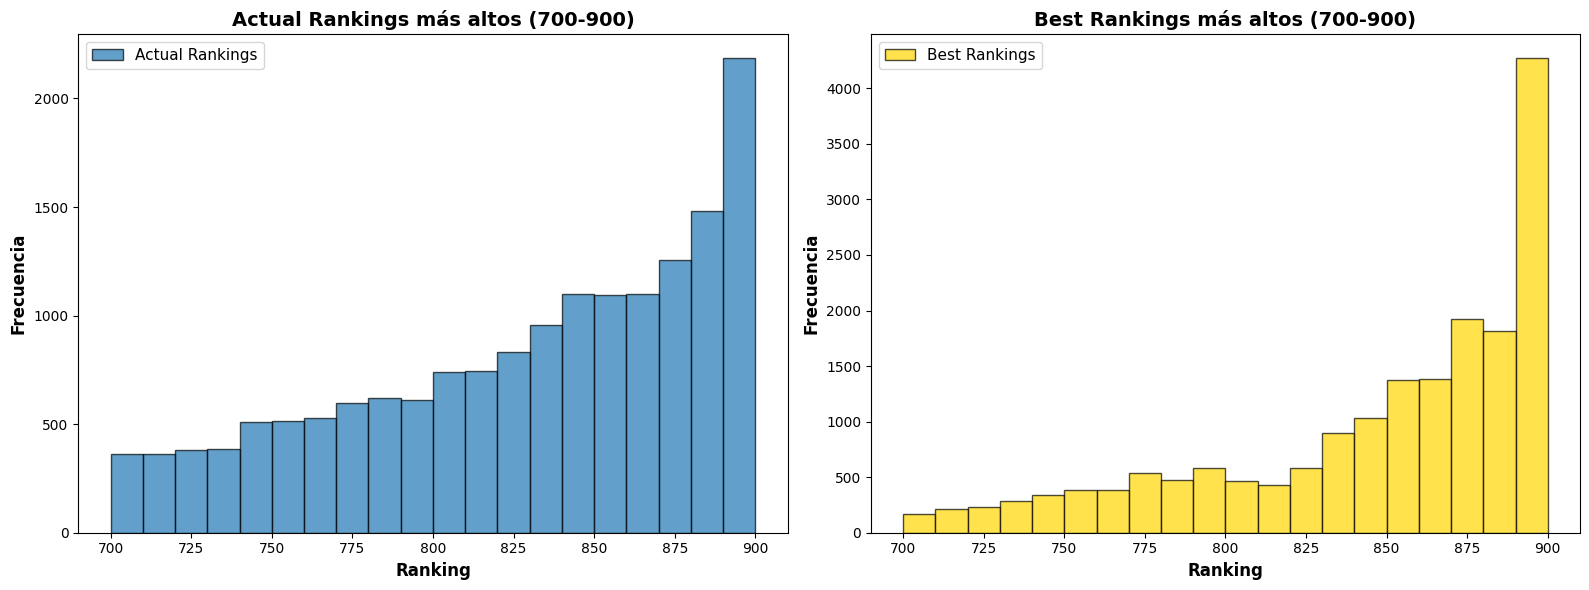

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
elite_rankings_actual = actual_ranking_900[actual_ranking_900 >= 700]  # Elite = valores altos
elite_rankings_best = best_ranking_900[best_ranking_900 >= 700]  # Elite = valores altos
# Histograma de Actual Rankings elite
axes[0].hist(elite_rankings_actual, bins=20, edgecolor='black', alpha=0.7, label='Actual Rankings')
axes[0].set_title('Actual Rankings más altos (700-900)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ranking', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=11)

# Histograma de Best Rankings elite
axes[1].hist(elite_rankings_best, bins=20, edgecolor='black', alpha=0.7, color='gold', label='Best Rankings')
axes[1].set_title('Best Rankings más altos (700-900)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ranking', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

Distribución por grupos de nivel

([<matplotlib.axis.XTick at 0x1ab03fa7090>,
 [Text(0, 0, '(800-900)'),
  Text(1, 0, '(600-799)'),
  Text(2, 0, '(400-599)'),
  Text(3, 0, '(200-399)'),
  Text(4, 0, '(1-199)')])

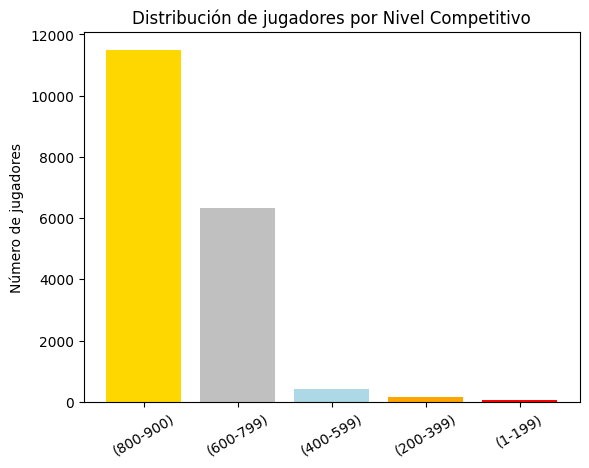

In [17]:
grupos_nivel = [
    (800, 900, "(800-900)"),
    (600, 799, "(600-799)"),
    (400, 599, "(400-599)"),
    (200, 399, "(200-399)"),
    (1, 199, "(1-199)")
]

nivel_grupos = []
labels = []
for min_r, max_r, label in grupos_nivel:
    count = ((actual_ranking_900 >= min_r) & (actual_ranking_900 <= max_r)).sum()
    nivel_grupos.append(count)
    labels.append(f"{label}\n({count})")

plt.bar(range(len(nivel_grupos)), nivel_grupos, color=['gold', 'silver', 'lightblue', 'orange', 'red'])
plt.title('Distribución de jugadores por Nivel Competitivo')
plt.ylabel('Número de jugadores')
plt.xticks(range(len(labels)), [l.split('\n')[0] for l in labels], rotation=30)

Concentración problemática

Text(0.5, 1.0, 'Proporción Elite vs Resto')

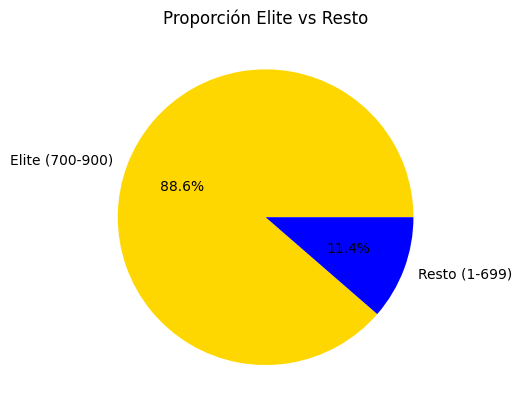

In [36]:
elite_vs_resto = [
    len(actual_ranking_900[actual_ranking_900 >= 700]),  # Elite
    len(actual_ranking_900[actual_ranking_900 < 700])   # Resto
]
plt.pie(elite_vs_resto, labels=['Elite (700-900)', 'Resto (1-699)'], 
        autopct='%1.1f%%', colors=['gold', 'blue'])
plt.title('Proporción Elite vs Resto')

In [37]:
print("DISTRIBUCIÓN DE RANKINGS")
print(f"Media: {actual_ranking_900.mean():.1f}")
print(f"Mediana: {actual_ranking_900.median():.1f}")
print(f"Mínimo: {actual_ranking_900.min()} (peor jugador)")
print(f"Máximo: {actual_ranking_900.max()} (mejor jugador)")

print(f"\n=== ASIMETRÍA DE LA DISTRIBUCIÓN ===")
print(f"Asimetría: {actual_ranking_900.skew():.3f}")

DISTRIBUCIÓN DE RANKINGS
Media: 801.3
Mediana: 829.0
Mínimo: 6 (peor jugador)
Máximo: 900 (mejor jugador)

=== ASIMETRÍA DE LA DISTRIBUCIÓN ===
Asimetría: -2.744


Distribución de partidos por nivel:
grupo_nivel
Alto     4991
Elite    3275
Medio     993
Name: count, dtype: int64
Nivel Medio:  69.3% victorias Home (420 partidos)
Ejemplos: 723 vs 659 (dif=64)
Nivel  Alto:  64.8% victorias Home (1969 partidos)
Ejemplos: 768 vs 665 (dif=103)
Nivel Elite:  76.9% victorias Home (672 partidos)
Ejemplos: 890 vs 815 (dif=75)


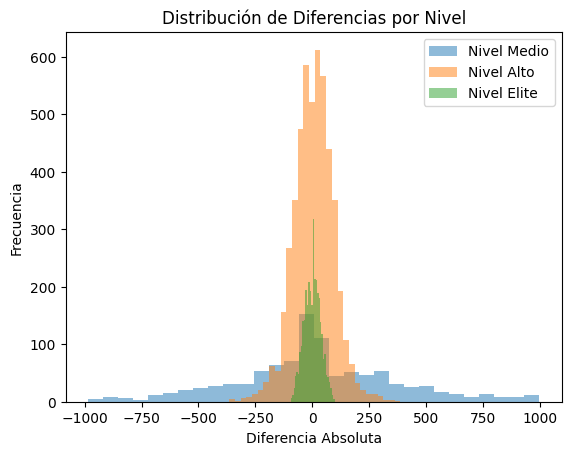

In [19]:
# Crear las diferencias absolutas, mucha asimetría, no se distribuyen uniformemente
actual['dif_absoluta'] = actual['ActualRankingHome'] - actual['ActualRankingAway']

# Clasificar partidos por nivel competitivo, promedio de ambos rankings para determinar el "nivel" del partido
actual['nivel_partido'] = (actual['ActualRankingHome'] + actual['ActualRankingAway']) / 2
actual['grupo_nivel'] = pd.cut(actual['nivel_partido'], 
                              bins=[0, 700, 850, 900], 
                              labels=['Medio', 'Alto', 'Elite'])

print("Distribución de partidos por nivel:")
print(actual['grupo_nivel'].value_counts())

#Partidos con la misma diferencia absoluta, tendrán diferente impacto dependiendo del nivel de los jugadores
resultados_contexto = []

for nivel in ['Medio', 'Alto', 'Elite']:
    subset = actual[actual['grupo_nivel'] == nivel]
    if len(subset) > 100:
        # Filtrar partidos donde Home tiene ventaja grande (+30 o más)
        grandes_dif = subset[subset['dif_absoluta'] > 30]
        
        if len(grandes_dif) > 10:
            tasa_victoria = (grandes_dif['winnerCode'] == 0).mean() * 100
            num_partidos = len(grandes_dif)
            
            print(f"Nivel {nivel:>5}: {tasa_victoria:>5.1f}% victorias Home ({num_partidos} partidos)")
            
            # Ejemplos concretos
            ejemplos = grandes_dif[['ActualRankingHome', 'ActualRankingAway', 'dif_absoluta', 'winnerCode']].head(3)
            print(f"Ejemplos: {ejemplos['ActualRankingHome'].iloc[0]:.0f} vs {ejemplos['ActualRankingAway'].iloc[0]:.0f} (dif={ejemplos['dif_absoluta'].iloc[0]:.0f})")
            
            resultados_contexto.append(tasa_victoria)




#Sistribución de diferencias por nivel
for nivel in ['Medio', 'Alto', 'Elite']:
    subset = actual[actual['grupo_nivel'] == nivel]
    if len(subset) > 100:
        plt.hist(subset['dif_absoluta'], alpha=0.5, label=f'Nivel {nivel}', bins=30)
plt.xlabel('Diferencia Absoluta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Diferencias por Nivel')
plt.legend()
plt.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_11000\121451627.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = subset.groupby(bins)['winnerCode'].apply(lambda x: (x==0).mean() * 100)


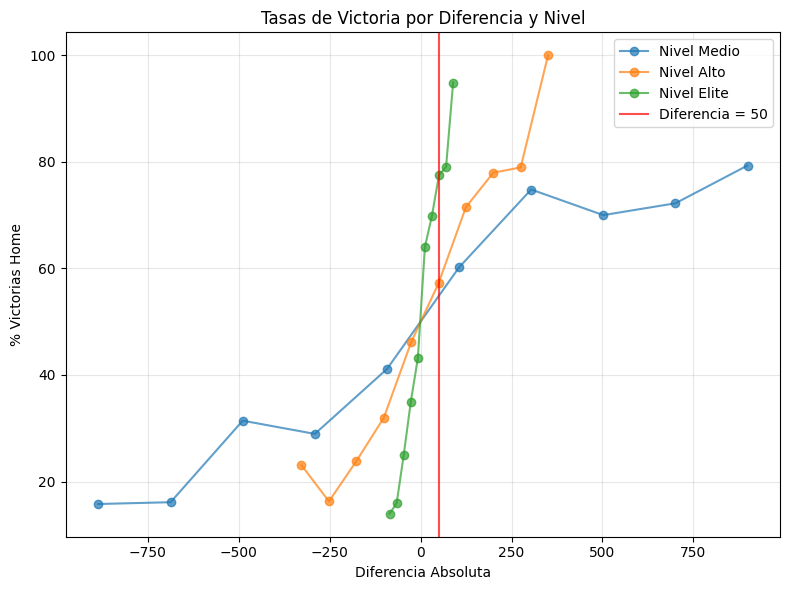

In [41]:
plt.figure(figsize=(8, 6))
#Tasas de victoria por diferencia y nivel
for nivel in ['Medio', 'Alto', 'Elite']:
    subset = actual[actual['grupo_nivel'] == nivel]
    if len(subset) > 100:
        # Crear bins y calcular tasas
        bins = pd.cut(subset['dif_absoluta'], bins=10)
        tasas = subset.groupby(bins)['winnerCode'].apply(lambda x: (x==0).mean() * 100)
        bin_centers = [interval.mid for interval in tasas.index]
        plt.plot(bin_centers, tasas, marker='o', label=f'Nivel {nivel}', alpha=0.7)

# Añadir línea vertical de referencia en x=50
plt.axvline(x=50, color='red', linestyle='-', alpha=0.7, label='Diferencia = 50')

plt.xlabel('Diferencia Absoluta')
plt.ylabel('% Victorias Home')
plt.title('Tasas de Victoria por Diferencia y Nivel')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
actual.loc[actual['ProbabilityAway']==125, 'ProbabilityAway'] = 0.125
actual.loc[actual['ProbabilityHome']==125, 'ProbabilityHome'] = 0.125
actual.loc[(actual['ProbabilityHome']==1) & (actual['ProbabilityAway']==1), 'ProbabilityHome'] = 0.1
actual.loc[(actual['ProbabilityHome']==1) & (actual['ProbabilityAway']==1), 'ProbabilityAway'] = 0.943396226
actual[(actual['ProbabilityAway'] >= 1) | (actual['ProbabilityHome'] >= 1)]
actual[['ProbabilityHome', 'ProbabilityAway']].isnull().sum()


ProbabilityHome    793
ProbabilityAway    793
dtype: int64

In [43]:
filas_null= actual[actual[['ProbabilityHome', 'ProbabilityAway']].isnull().any(axis=1)]
filas_nulas = actual[actual.isnull().any(axis=1)].index.tolist()
actual.drop(index=filas_nulas, inplace=True)

=== ANÁLISIS DE PROBABILIDADES DEL MERCADO ===
Suma probabilidades promedio: 1.058
Vigorish promedio: 0.058
Sesgo del mercado - Media Prob Home: 0.541


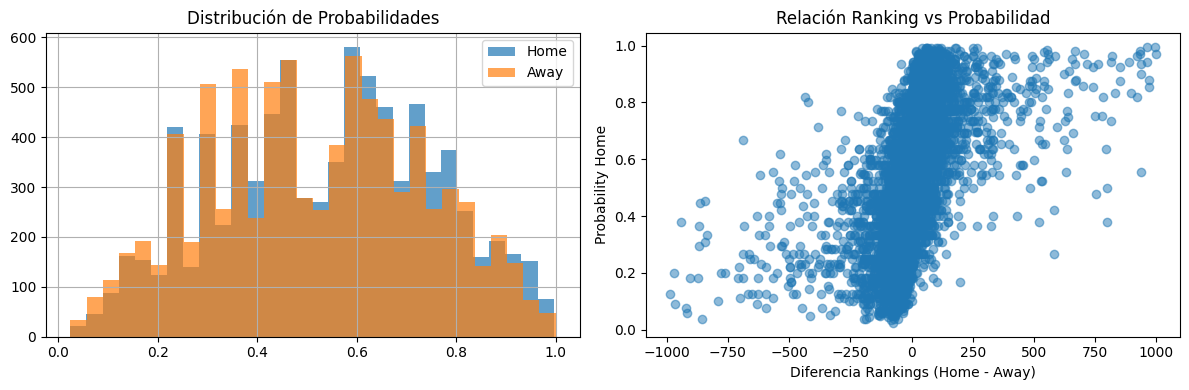

Precisión del mercado: 0.688


In [44]:
# ANÁLISIS SIMPLE DE VARIABLES PROBABILÍSTICAS
print("=== ANÁLISIS DE PROBABILIDADES DEL MERCADO ===")

# Estadísticas básicas
print(f"Suma probabilidades promedio: {(actual['ProbabilityHome'] + actual['ProbabilityAway']).mean():.3f}")
print(f"Vigorish promedio: {((actual['ProbabilityHome'] + actual['ProbabilityAway']) - 1).mean():.3f}")
print(f"Sesgo del mercado - Media Prob Home: {actual['ProbabilityHome'].mean():.3f}")

# Visualización simple
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribuciones
actual['ProbabilityHome'].hist(bins=30, ax=axes[0], alpha=0.7)
actual['ProbabilityAway'].hist(bins=30, ax=axes[0], alpha=0.7) 
axes[0].set_title('Distribución de Probabilidades')
axes[0].legend(['Home', 'Away'])

# Relación con rankings
axes[1].scatter(actual['ActualRankingHome'] - actual['ActualRankingAway'], 
                actual['ProbabilityHome'], alpha=0.5)
axes[1].set_xlabel('Diferencia Rankings (Home - Away)')
axes[1].set_ylabel('Probability Home')
axes[1].set_title('Relación Ranking vs Probabilidad')

plt.tight_layout()
plt.show()

# Precisión del mercado
precision = ((actual['ProbabilityHome'] > 0.5) == (actual['winnerCode'] == 0)).mean()
print(f"Precisión del mercado: {precision:.3f}")

📊 Estadísticas del mercado:

Vigorish = 5.8%: Margen típico y razonable de las casas de apuestas
Sesgo Home = 54.1%: Ligera ventaja del jugador local (normal en tenis)
Precisión = 68.8%: Excelente capacidad predictiva del mercado

🎯 Gráfico 1 - Distribuciones:

Concentración en extremos: Muchos partidos con favoritos claros (prob ~0.8-0.9)
Pocos partidos equilibrados: Menos casos cerca del 0.5
Distribuciones simétricas: Home y Away se comportan de forma similar

📈 Gráfico 2 - Relación ranking vs probabilidad:

Correlación clara: A mayor diferencia de ranking → mayor probabilidad
Relación no-lineal: La curva se aplana en los extremos
Buena cobertura: Datos bien distribuidos en todo el rango

=== ANÁLISIS DE LA VARIABLE OBJETIVO (winnerCode) ===
Distribución del target:
Gana Home (0): 4315 (51.0%)
Gana Away (1): 4151 (49.0%)

Ratio de balance: 0.962
✅ Dataset balanceado


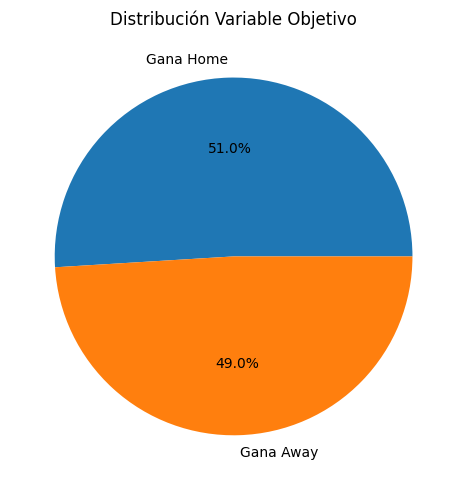


=== VENTAJA LOCAL POR SUPERFICIE ===
% Victorias Home por superficie:
Grass: 55.2%
Hardcourt indoor: 52.3%
Hardcourt outdoor: 49.7%
Red clay: 50.7%


In [49]:
# ANÁLISIS DE LA VARIABLE OBJETIVO
print("=== ANÁLISIS DE LA VARIABLE OBJETIVO (winnerCode) ===")

# Distribución básica
target_counts = actual['winnerCode'].value_counts()
print("Distribución del target:")
print(f"Gana Home (0): {target_counts[0]} ({target_counts[0]/len(actual)*100:.1f}%)")
print(f"Gana Away (1): {target_counts[1]} ({target_counts[1]/len(actual)*100:.1f}%)")

# Evaluar balance
ratio = min(target_counts) / max(target_counts)
print(f"\nRatio de balance: {ratio:.3f}")
if ratio > 0.8:
    print("✅ Dataset balanceado")
elif ratio > 0.6:
    print("⚠️ Ligero desbalance")
else:
    print("❌ Dataset desbalanceado")

# Visualización 1: Distribución target
fig1, ax1 = plt.subplots(figsize=(5, 5))
target_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', labels=['Gana Home', 'Gana Away'])
ax1.set_title('Distribución Variable Objetivo')
ax1.set_ylabel('')
plt.tight_layout()
plt.show()

# Análisis por superficie
print(f"\n=== VENTAJA LOCAL POR SUPERFICIE ===")
ventaja_por_superficie = actual.groupby('groundType')['winnerCode'].apply(lambda x: (x==0).mean() * 100)
print("% Victorias Home por superficie:")
for superficie, porcentaje in ventaja_por_superficie.items():
    print(f"{superficie}: {porcentaje:.1f}%")


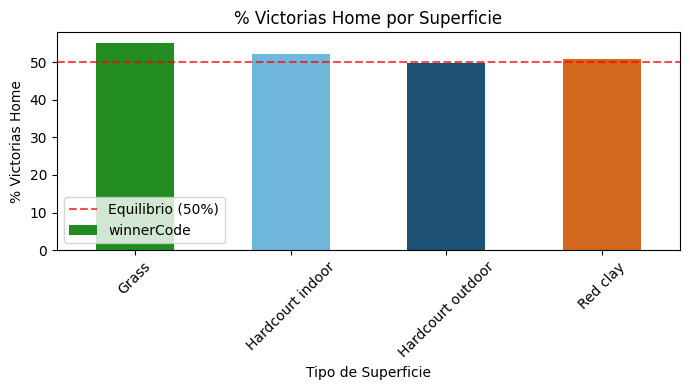


=== CONCLUSIÓN ===
Dataset bien balanceado, no requiere técnicas especiales de balanceo.
Ventaja del jugador local promedio: 51.0%


In [50]:
# Diccionario de colores por superficie
colors = {
    'Hardcourt outdoor': '#1C5174',
    'Red clay': '#D2691E',           
    'Grass': '#228B22',             
    'Hardcourt indoor': '#6FB8DC'  
}

# Obtener la lista de colores en el orden correcto según el índice del DataFrame
color_list = [colors[surface] for surface in ventaja_por_superficie.index]

# Visualización 2: Ventaja por superficie
fig2, ax2 = plt.subplots(figsize=(7, 4))
ventaja_por_superficie.plot(kind='bar', ax=ax2, color=color_list)
ax2.set_title('% Victorias Home por Superficie')
ax2.set_ylabel('% Victorias Home')
ax2.set_xlabel('Tipo de Superficie')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Equilibrio (50%)')
ax2.legend()
plt.tight_layout()
plt.show()

# Impresión de conclusión
print(f"\n=== CONCLUSIÓN ===")
if ratio > 0.8:
    print("Dataset bien balanceado, no requiere técnicas especiales de balanceo.")
else:
    print("Considerar técnicas de balanceo durante el entrenamiento.")

print(f"Ventaja del jugador local promedio: {(target_counts[0]/len(actual)*100):.1f}%")



=== JUSTIFICACIÓN PARA STANDARDSCALER ===
Análisis de forma distribucional:

Diferencia Altura:
  Media: -0.000
  Skewness: 0.013
  Kurtosis: 0.168

Diferencia Peso:
  Media: -0.083
  Skewness: 0.015
  Kurtosis: 0.534

=== INTERPRETACIÓN ===
✅ Skewness ≈ 0: distribuciones simétricas
✅ Kurtosis ≈ 0: distribuciones mesocúrticas (normales)
✅ Centradas en 0: sin sesgo sistemático


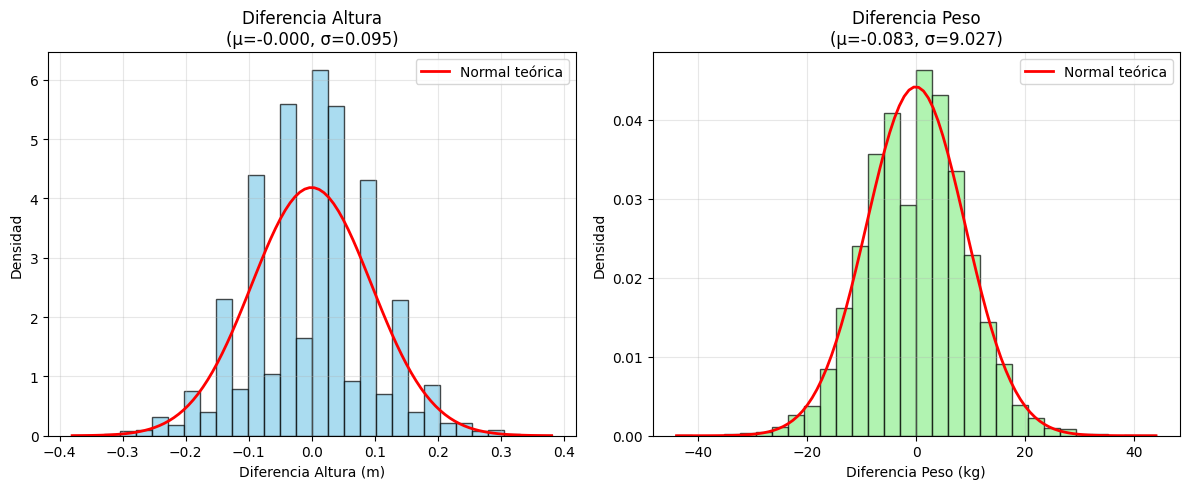

In [46]:
# JUSTIFICACIÓN STANDARDSCALER SIN TESTS CONTRADICTORIOS
from scipy import stats
import numpy as np

# Crear diferencias físicas
actual['dif_altura'] = actual['HeightHome'] - actual['HeightAway'] 
actual['dif_peso'] = actual['WeightHome'] - actual['WeightAway']

print("=== JUSTIFICACIÓN PARA STANDARDSCALER ===")
print("Análisis de forma distribucional:")
print()

print(f"Diferencia Altura:")
print(f"  Media: {actual['dif_altura'].mean():.3f}")
print(f"  Skewness: {actual['dif_altura'].skew():.3f}")
print(f"  Kurtosis: {actual['dif_altura'].kurtosis():.3f}")

print(f"\nDiferencia Peso:")
print(f"  Media: {actual['dif_peso'].mean():.3f}")
print(f"  Skewness: {actual['dif_peso'].skew():.3f}")
print(f"  Kurtosis: {actual['dif_peso'].kurtosis():.3f}")

print(f"\n=== INTERPRETACIÓN ===")
print("✅ Skewness ≈ 0: distribuciones simétricas")
print("✅ Kurtosis ≈ 0: distribuciones mesocúrticas (normales)")
print("✅ Centradas en 0: sin sesgo sistemático")


# Visualización con curva normal superpuesta
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Diferencia altura
axes[0].hist(actual['dif_altura'].dropna(), bins=30, density=True, alpha=0.7, 
             color='skyblue', edgecolor='black')

# Superponer curva normal teórica
mu_altura = actual['dif_altura'].mean()
sigma_altura = actual['dif_altura'].std()
x_altura = np.linspace(actual['dif_altura'].min(), actual['dif_altura'].max(), 100)
normal_altura = stats.norm.pdf(x_altura, mu_altura, sigma_altura)
axes[0].plot(x_altura, normal_altura, 'r-', linewidth=2, label='Normal teórica')
axes[0].set_title(f'Diferencia Altura\n(μ={mu_altura:.3f}, σ={sigma_altura:.3f})')
axes[0].set_xlabel('Diferencia Altura (m)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Diferencia peso
axes[1].hist(actual['dif_peso'].dropna(), bins=30, density=True, alpha=0.7, 
             color='lightgreen', edgecolor='black')

# Superponer curva normal teórica
mu_peso = actual['dif_peso'].mean()
sigma_peso = actual['dif_peso'].std()
x_peso = np.linspace(actual['dif_peso'].min(), actual['dif_peso'].max(), 100)
normal_peso = stats.norm.pdf(x_peso, mu_peso, sigma_peso)
axes[1].plot(x_peso, normal_peso, 'r-', linewidth=2, label='Normal teórica')
axes[1].set_title(f'Diferencia Peso\n(μ={mu_peso:.3f}, σ={sigma_peso:.3f})')
axes[1].set_xlabel('Diferencia Peso (kg)')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


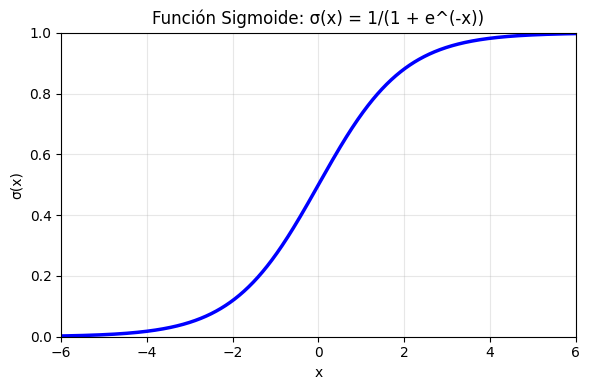

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.exp(-x))

# Crear gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'b-', linewidth=2.5)
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Función Sigmoide: σ(x) = 1/(1 + e^(-x))')
plt.grid(True, alpha=0.3)
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()